# TIGHT BINDING

In [1]:
# Importando paquetes necesarios
%matplotlib inline
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

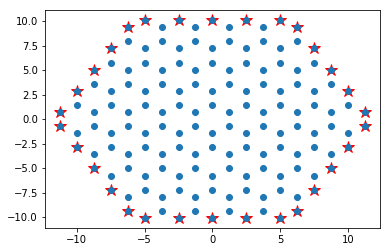

In [4]:
# Funcion que rota "x" y "y".
def rotacion(x,y, ang):
    A = [[np.cos(ang), -np.sin(ang)],
         [np.sin(ang), np.cos(ang)]]
    r = [x,y]
    return np.dot(A,r)

# Funcion que genera un punto cuantico triangular 
# Funcion que genera un punto cuantico triangular 
# de tamaño n
def triangularGraphene(n,d=0.0, ang=0.0):
    acc=1.44
    t = (0.75*n-0.25)*acc # Traslacion en "y" para centrar.
    x, y  = [0], [t+acc/2]
    for k in range(n):
        i=k+1
        j = t + k*-1.5*acc  
        X = np.arange(-i*sqrt(3)*acc/2, i*sqrt(3)*acc/2+1, sqrt(3)*acc)
        Y = np.ones(i+1)*j
        x += list(X)+list(X)
        y += list(Y)+list(Y-acc)
    x += list(X+sqrt(3)/2*acc)
    y += list(Y-1.5*acc)
    x.pop(-1)
    y.pop(-1)
    x, y = rotacion(x,y, ang)
    z = np.ones(len(x))*d
    return [x,y,z]

def hexagonalGraphene(n, d=0.0, ang=0.0):
    acc=1.44
    t = (1.5*n-1.)*acc # Traslacion en "y" para centrar.
    x, y = [], []
    I = list(np.arange(n,n*2-1))+list(np.arange(n*2-1,n-1,-1))
    for k in range(n*2-1):
        i=I[k]
        j = t + k*-1.5*acc    
        X = np.arange(-i*sqrt(3)*acc/2, i*sqrt(3)*acc/2+1, sqrt(3)*acc)
        Y= np.ones(i+1)*j
        x += list(X)+list(X)
        y += list(Y)+list(Y-acc)
    xx = list(np.arange(-(n-1)*sqrt(3)*acc/2, (n-1)*sqrt(3)*acc/2+1, sqrt(3)*acc))
    x += xx+xx
    y += list(np.ones(n)*max(y)+0.5*acc)+list(np.ones(n)*min(y)-0.5*acc)
    x, y = rotacion(x,y, ang)
    z = np.ones(len(x))*d
    return [x,y,z]

# Generando matriz de distancias entre los Carbonos.
def getMatrizDistancias(atom,coords, r=False):
    C = pd.DataFrame(coords, columns=['x', 'y', 'z'], index=atom)
    Cs = C[C.index==1] 
    X1, X2 = np.meshgrid(Cs.x,Cs.x)
    Y1, Y2 = np.meshgrid(Cs.y,Cs.y)
    Z1, Z2 = np.meshgrid(Cs.z,Cs.z)
    R = np.sqrt((X2-X1)**2+(Y2-Y1)**2+(Z2-Z1)**2)
    if r==True: 
        return R, Z2-Z1
    return R

# Funcion que obtiene la matriz T.
def getT(t, atom,coords):
    D = getMatrizDistancias(atom, coords)
    np.fill_diagonal(D, 1000)
    D[abs(D-1.44)>0.5]=0.
    D[D>0.]=t
    return np.array(D)

def coords_vecinos(coords):
    # Generando energias.
    t = -2.8
    atom = np.ones(len(coords)) #Etiquetas
    T = getT(t, atom, coords)
    m,p = T.shape
    # Extrayendo carbonos con dos vecinos.
    bordes=[]
    for i in range(m):
        Nvecinos = list(T[i]).count(t)
        if Nvecinos==2:
            bordes+=[coords[i]]
    return bordes


def coords_Hydrogens(coords, ang=0.0, acc=1.44):
    x,y,z=np.transpose(coords)
    x,y=rotacion(x,y,-ang)
    bordes = coords_vecinos(np.transpose([x,y,z]))
    x, y, z = np.transpose(bordes)
    plt.plot(x,y,'*r', ms=12)
    Nb = len(bordes)
    n = (Nb//3)-1
    #------------------------------------
    y[0]=y[0]-acc # vértice.
    #------------------------------------
    r=Nb-n-3 # aristas.
    s=np.sign(x[1:r+1])
    x[1:r+1]=x[1:r+1]+np.sqrt(3)/2*acc*s
    y[1:r]=y[1:r]-0.5*acc
    y[r]=y[r]+0.5*acc
    #------------------------------------
    r = Nb-n-2 # vértice
    y[r:Nb-2]=y[r:Nb-2]+acc
    #------------------------------------
    r=Nb-1 # vértice
    x[r]=x[r]+np.sqrt(3)/2*acc
    y[r]=y[r]+0.5*acc
    #------------------------------------
    r=Nb-2 # vértice
    x[r] = x[r] + np.sqrt(3)/2*acc
    y[r] = y[r] -0.5*acc
    #------------------------------------
    x, y = rotacion(x,y, ang)
    return np.transpose([x,y,z])


x,y,z = hexagonalGraphene(5)
coords = np.transpose([x,y,z])
x1,y1,z1=np.transpose(coords_Hydrogens(coords))

plt.plot(x,y,'o')
#plt.plot(x1,y1,'o')
